# Chapter 1 folloow along

In [1]:
version

               _                           
platform       x86_64-conda_cos6-linux-gnu 
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

In [2]:
Fact <- function(n) if (n == 1) 1 else n * Fact(n - 1)
Fact(5)

[1] 120

In [20]:
options(digits=3)

In [4]:
data(AirPassengers)
AP <- AirPassengers
AP

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [5]:
class(AP)

[1] "ts"

In [6]:
start(AP); end(AP); frequency(AP)

[1] 1949    1

[1] 1960   12

[1] 12

In [7]:
summary(AP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    104     180     266     280     360     622 

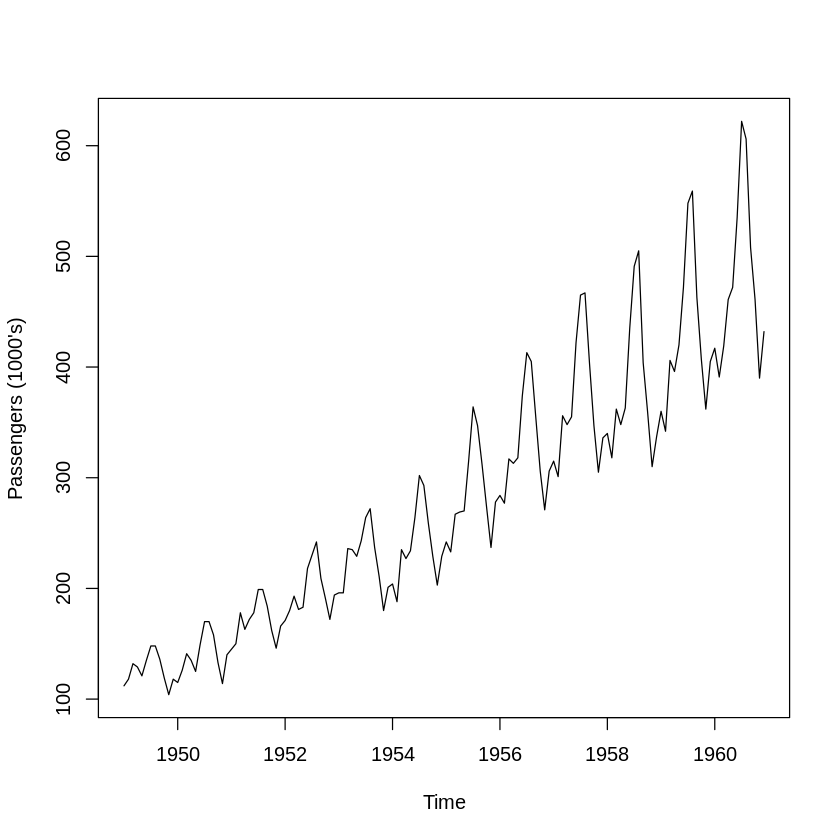

In [8]:
plot(AP, ylab = "Passengers (1000's)")

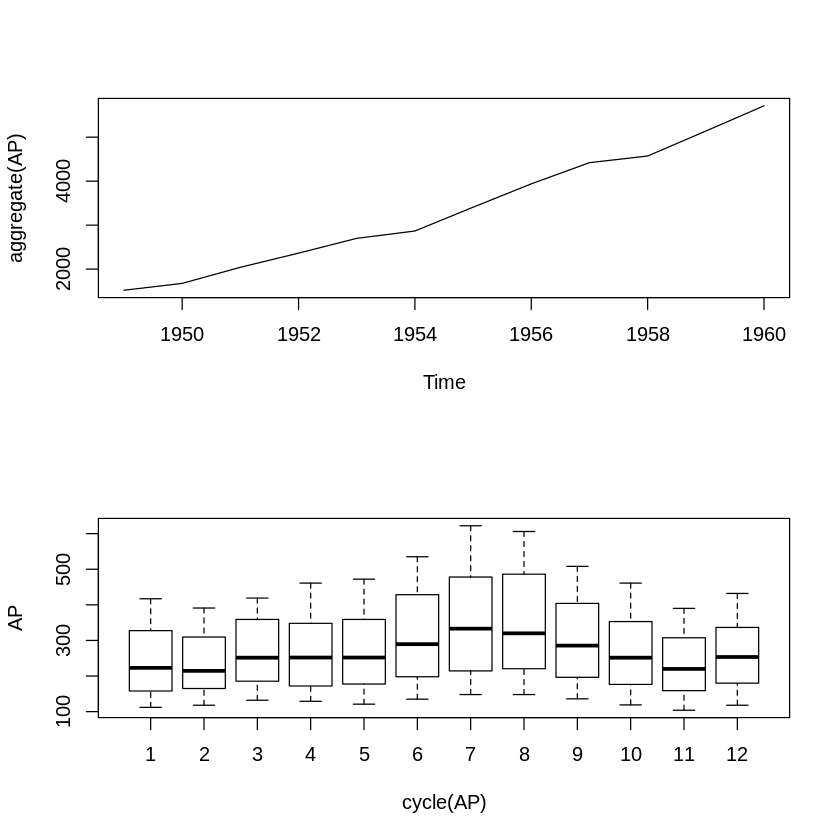

In [9]:
layout(1:2) 
plot(aggregate(AP))
boxplot(AP ~ cycle(AP))

In [10]:
www <- "https://raw.githubusercontent.com/svkerr/R_Files/master/TimeSeries/Maine.dat"
Maine.month <- read.table(www, header = TRUE)

attach(Maine.month)
class(Maine.month)

[1] "data.frame"

In [11]:
Maine.month.ts <- ts(unemploy, start = c(1996, 1), freq = 12)

In [14]:
Maine.annual.ts <- aggregate(Maine.month.ts)/12

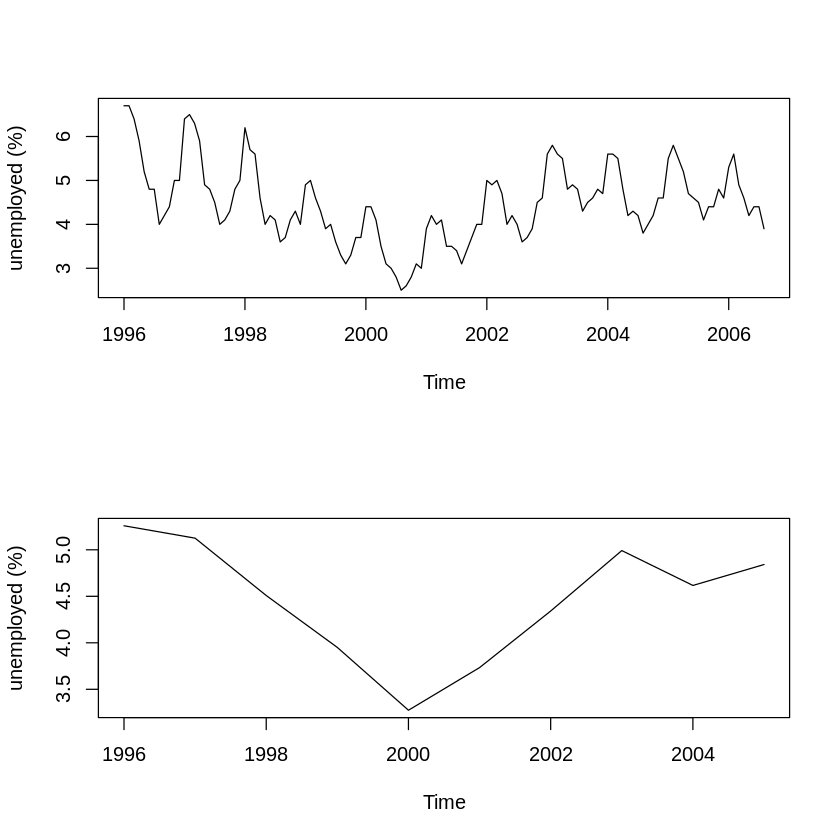

In [15]:
layout(1:2)
plot(Maine.month.ts, ylab = "unemployed (%)")
plot(Maine.annual.ts, ylab = "unemployed (%)")


In [21]:
Maine.Feb <- window(Maine.month.ts, start = c(1996,2), freq = TRUE)
Maine.Aug <- window(Maine.month.ts, start = c(1996,8), freq = TRUE)
Feb.ratio <- mean(Maine.Feb) / mean(Maine.month.ts)
Aug.ratio <- mean(Maine.Aug) / mean(Maine.month.ts)
Feb.ratio
Aug.ratio

[1] 1.22

[1] 0.816

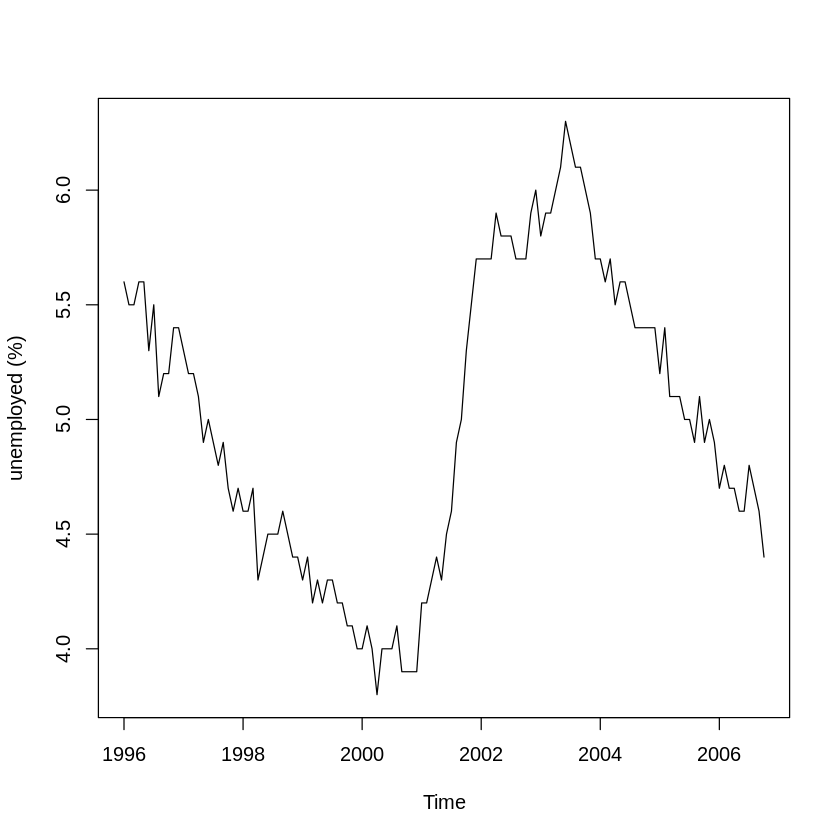

In [22]:
www <- "https://raw.githubusercontent.com/AtefOuni/ts/master/Data/USunemp.dat"
US.month <- read.table(www, header = T)
attach(US.month)
US.month.ts <- ts(USun, start=c(1996,1), end=c(2006,10), freq = 12)
plot(US.month.ts, ylab = "unemployed (%)")


In [24]:
www <- "https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/cbe.dat"

CBE <- read.table(www, header = T)


CBE[1:4, ]

,choc,beer,elec
,<int>,<dbl>,<int>
1,1451,96.3,1497
2,2037,84.4,1463
3,2477,91.2,1648
4,2785,81.9,1595


In [25]:
class(CBE)

[1] "data.frame"

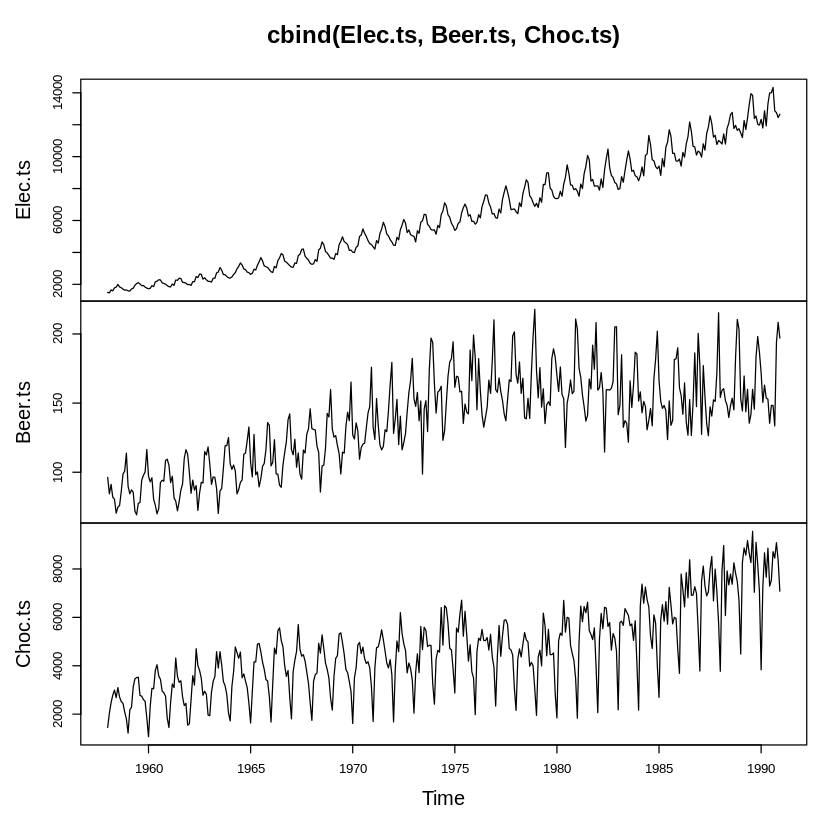

In [26]:
Elec.ts <- ts(CBE[, 3], start = 1958, freq = 12)
Beer.ts <- ts(CBE[, 2], start = 1958, freq = 12)
Choc.ts <- ts(CBE[, 1], start = 1958, freq = 12)
plot(cbind(Elec.ts, Beer.ts, Choc.ts))

In [28]:
AP.elec <- ts.intersect(AP, Elec.ts)
start(AP.elec)

[1] 1958    1

In [29]:
end(AP.elec)

[1] 1960   12

In [30]:
AP.elec[1:3, ]

AP,Elec.ts
340,1497
318,1463
362,1648


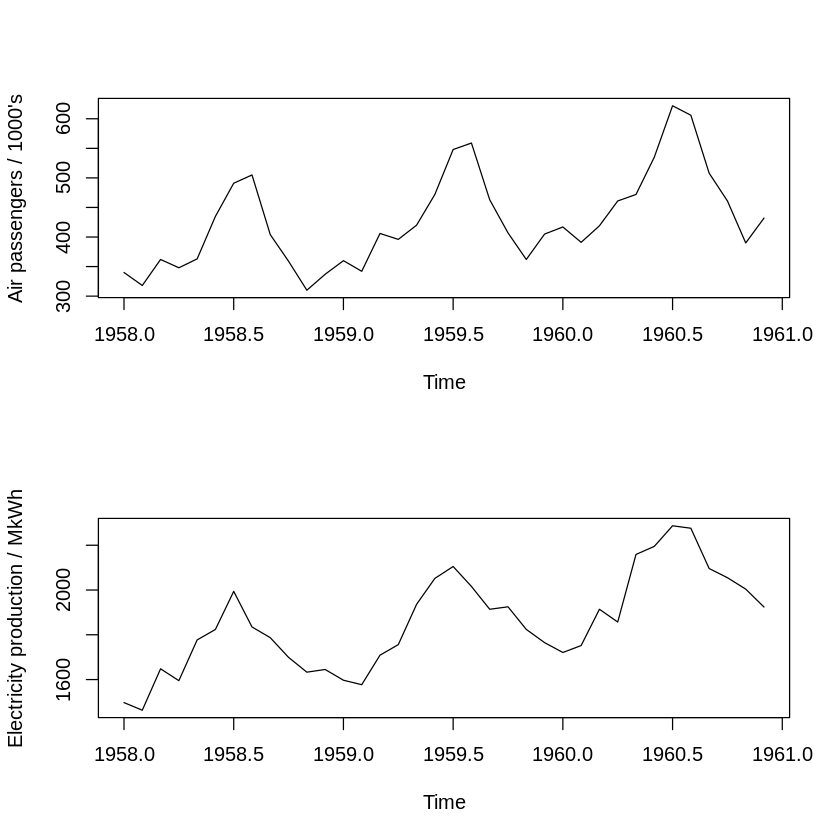

In [32]:
AP <- AP.elec[,1]; Elec <- AP.elec[,2]
layout(1:2)
plot(AP, main = "", ylab = "Air passengers / 1000's")
plot(Elec, main = "", ylab = "Electricity production / MkWh")

[1] 0.884

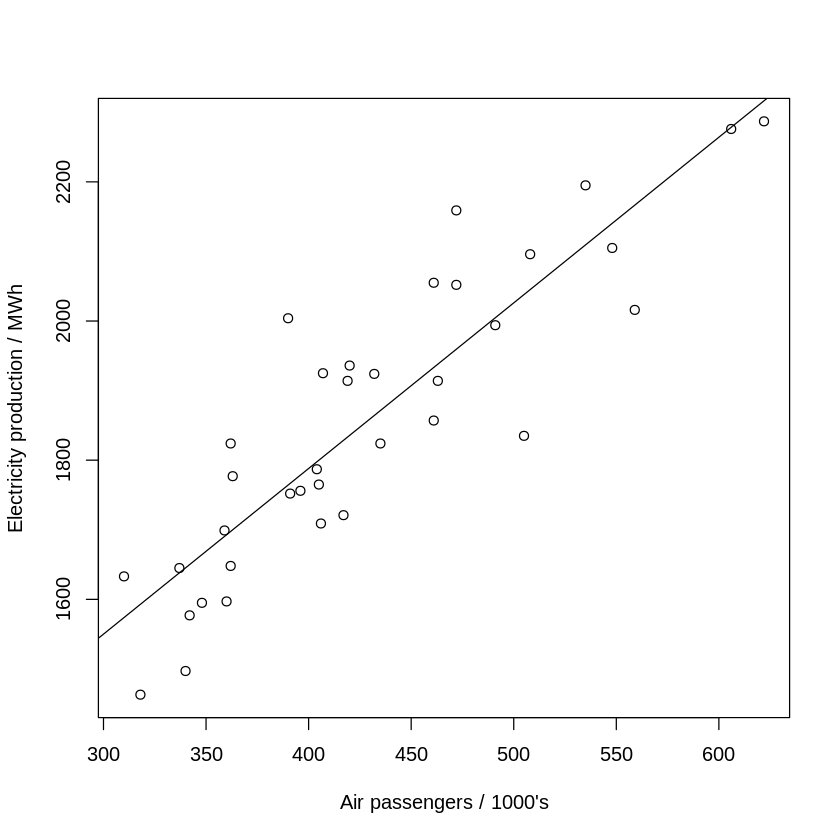

In [36]:
plot(as.vector(AP), as.vector(Elec),
xlab = "Air passengers / 1000's",
                       ylab = "Electricity production / MWh")
abline(reg = lm(Elec ~ AP))
cor(AP, Elec)

In [37]:
 www <- "https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/pounds_nz.dat"
 Z <- read.table(www, header = T)
 Z[1:4, ]

[1] 2.92 2.94 3.17 3.25

In [38]:
Z.ts <- ts(Z, st = 1991, fr = 4)

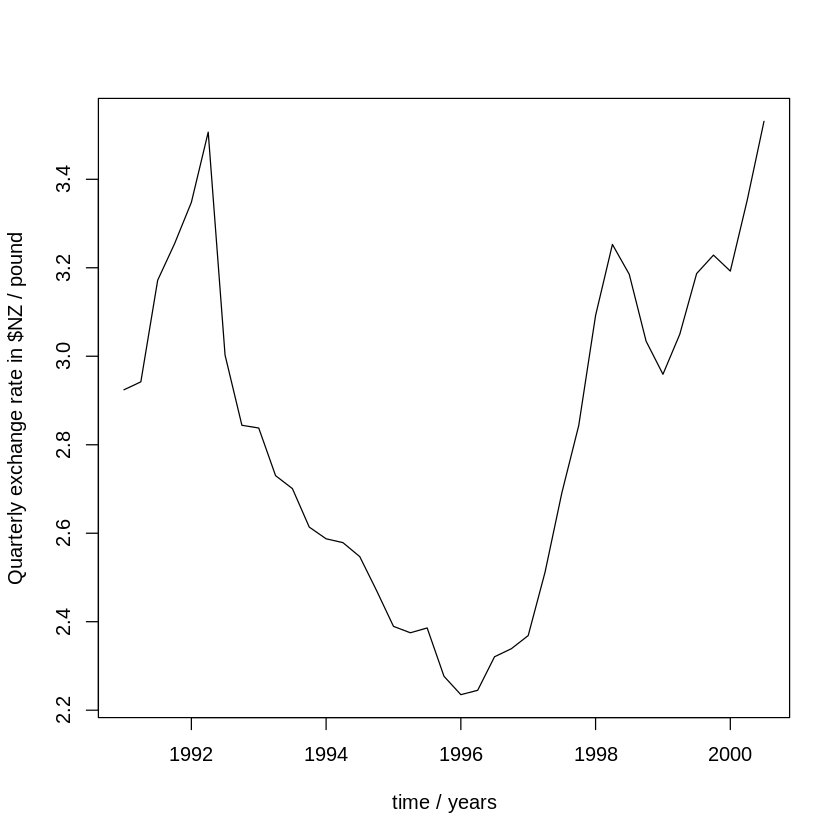

In [39]:
plot(Z.ts, xlab = "time / years",
              ylab = "Quarterly exchange rate in $NZ / pound")

In [40]:
Z.92.96 <- window(Z.ts, start = c(1992, 1), end = c(1996, 1))
Z.96.98 <- window(Z.ts, start = c(1996, 1), end = c(1998, 1))

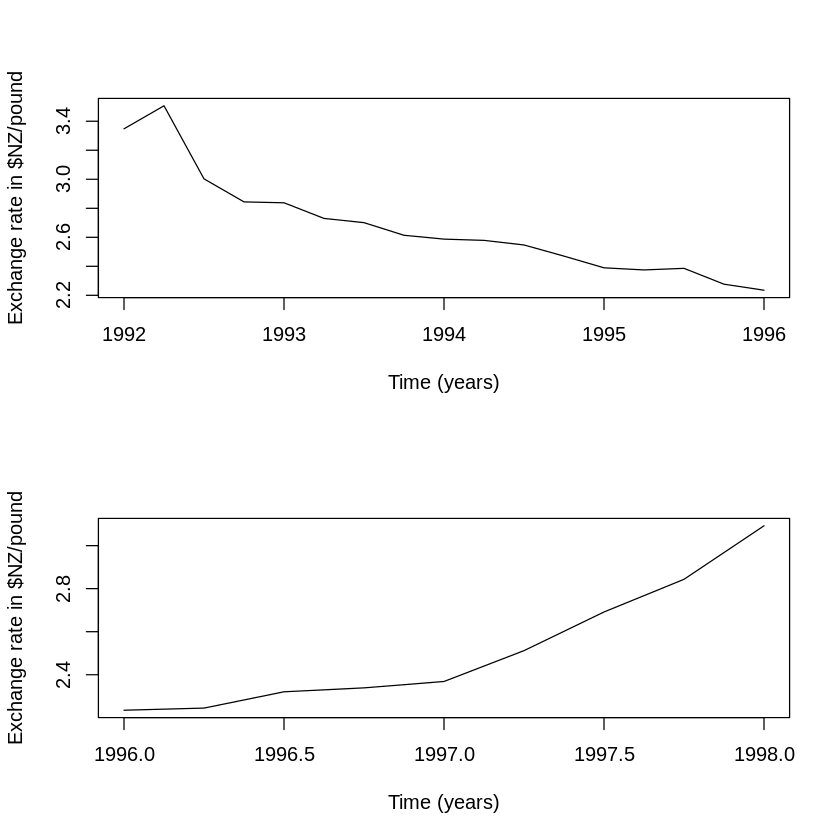

In [41]:
layout (1:2)
plot(Z.92.96, ylab = "Exchange rate in $NZ/pound",
                 xlab = "Time (years)" )
plot(Z.96.98, ylab = "Exchange rate in $NZ/pound",
                 xlab = "Time (years)" )

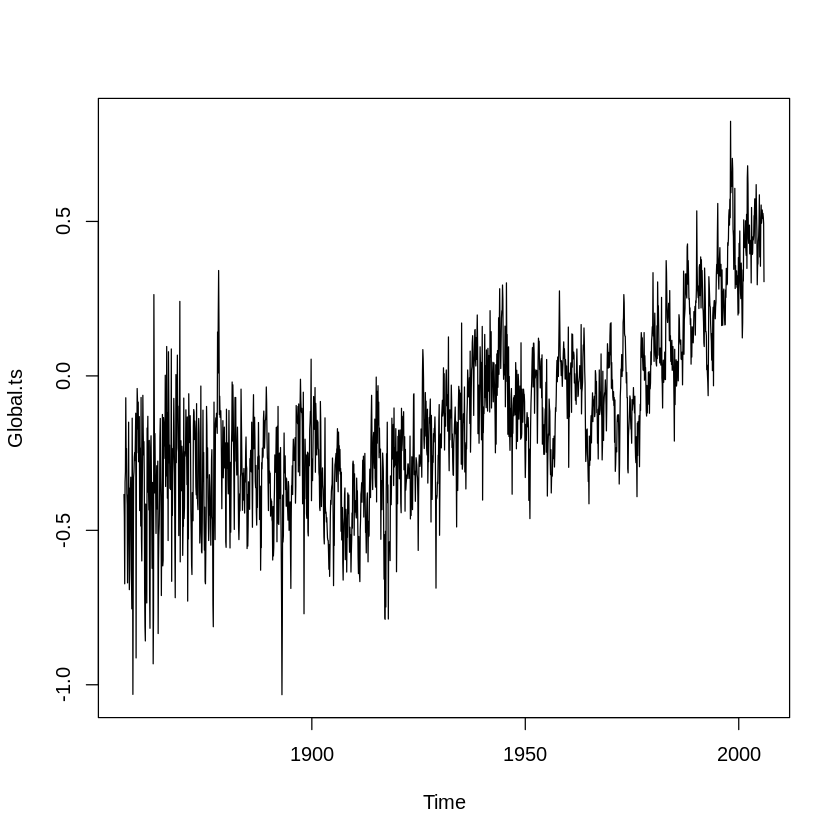

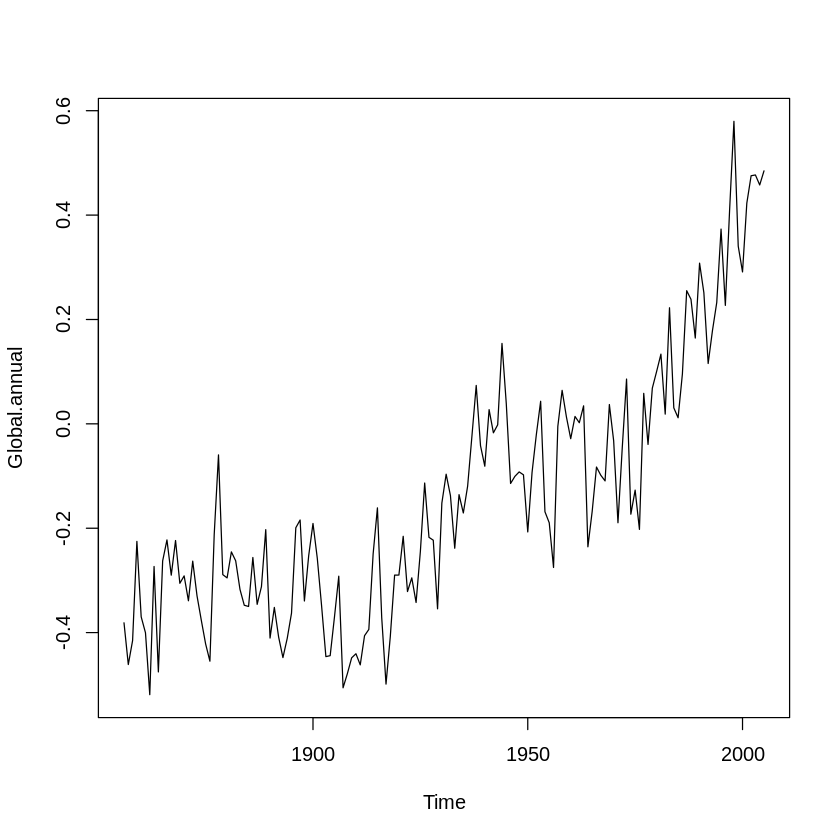

In [42]:
www <- "https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/global.dat"
Global <- scan(www)
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005, 12),
      fr = 12)
Global.annual <- aggregate(Global.ts, FUN = mean)
plot(Global.ts)
plot(Global.annual)

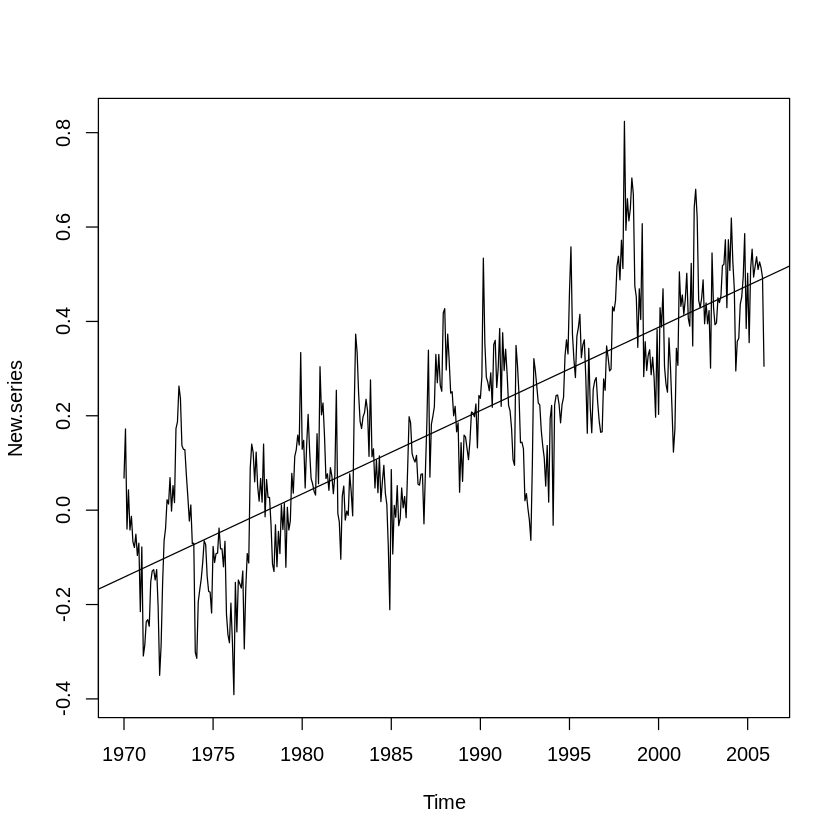

In [43]:
New.series <- window(Global.ts, start=c(1970, 1), end=c(2005, 12))
New.time <- time(New.series)
plot(New.series); abline(reg=lm(New.series ~ New.time))

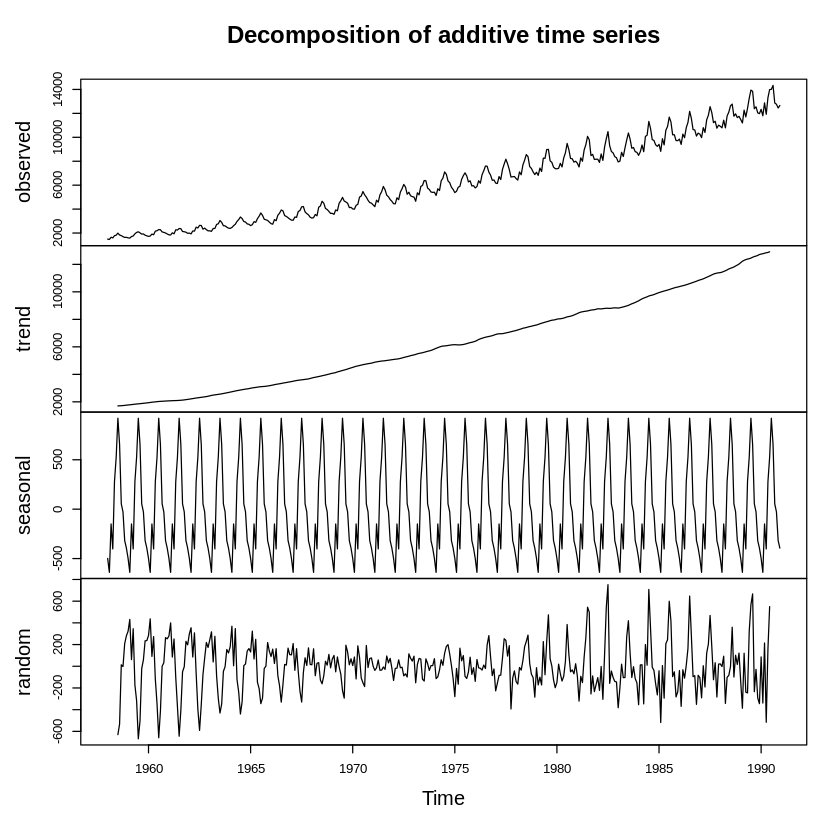

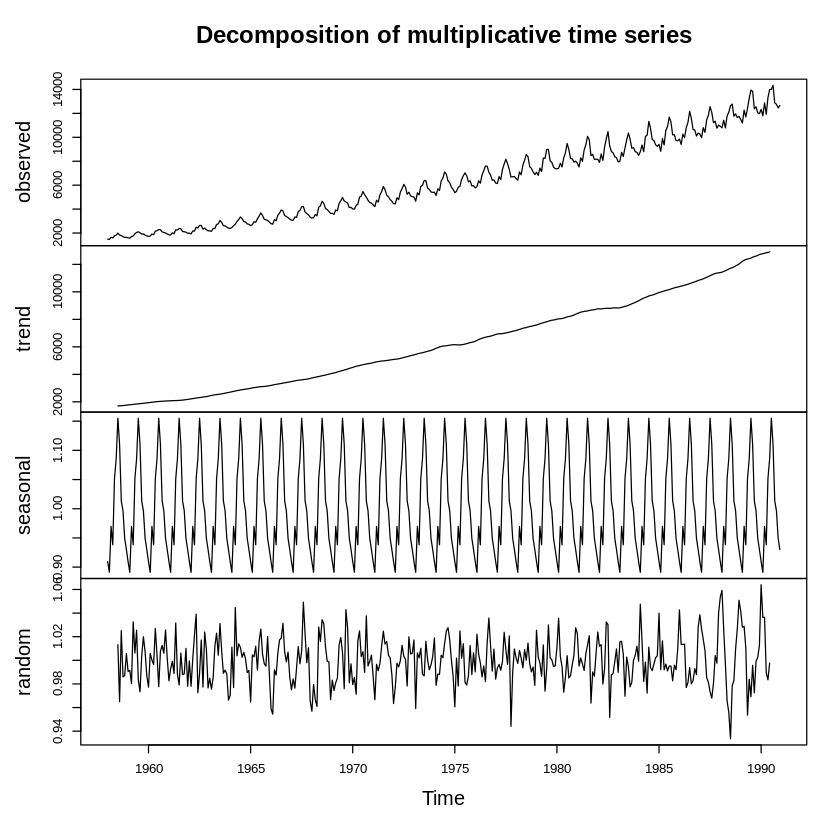

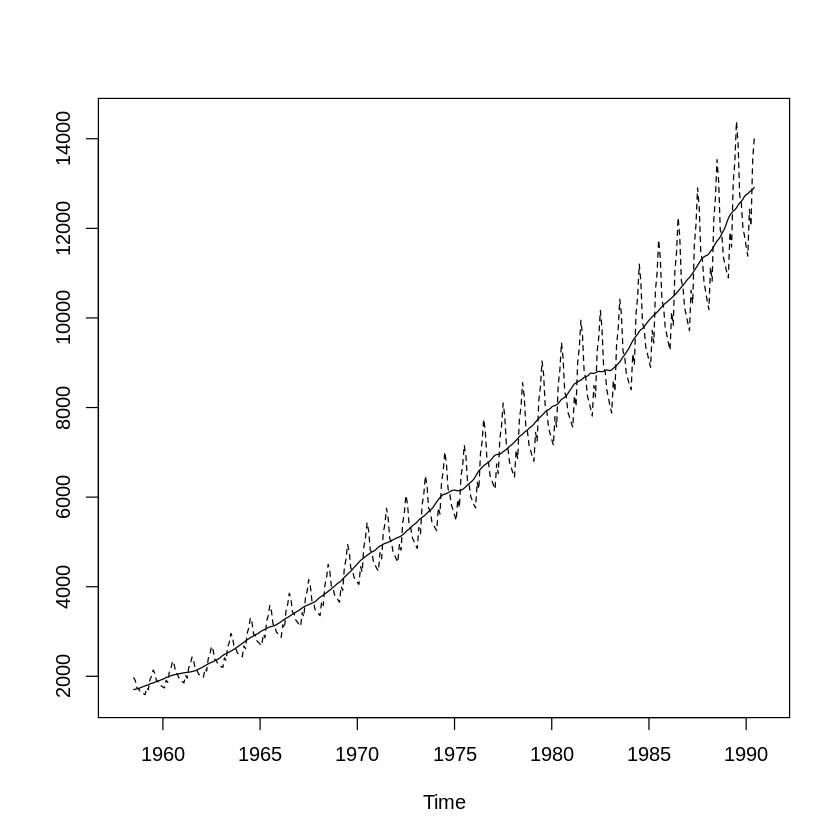

In [47]:
plot(decompose(Elec.ts))
Elec.decom <- decompose(Elec.ts, type = "mult")
plot(Elec.decom)
Trend <- Elec.decom$trend
Seasonal <- Elec.decom$seasonal
ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)